Q1: What proportion of students who answer this question quickly will pass the class? Assume the probability of passing the class is 0.9. Assume the probability of answering this question quickly is 0.6 if you'll pass the class, while the probability drops to 0.3 if you'll not pass the class.

In [1]:
# Define probabilities
P_pass = 0.9
P_fail = 1 - P_pass
P_quick_given_pass = 0.6
P_quick_given_fail = 0.3

# Calculate P(Quick) using the law of total probability
P_quick = (P_quick_given_pass * P_pass) + (P_quick_given_fail * P_fail)

# Calculate P(Pass | Quick) using Bayes' Theorem
P_pass_given_quick = (P_quick_given_pass * P_pass) / P_quick

# Print the result
print(f"The proportion of students who answer quickly and will pass the class is approximately {P_pass_given_quick:.4f}.")


The proportion of students who answer quickly and will pass the class is approximately 0.9474.


Q2:

##### 1. **Likelihood**:
The likelihood is given by:
$$p(x \mid \theta, n) \propto \prod_{i=1}^k \theta_i^{x_i}$$
where $$ x = (x_1, x_2, \dots, x_k) $$ are the counts for each category.

##### 2. **Prior**:
The prior is a **Dirichlet distribution**:
$$p(\theta \mid \alpha) \propto \prod_{i=1}^k \theta_i^{\alpha_i - 1}$$
where $$ \alpha = (\alpha_1, \alpha_2, \dots, \alpha_k) $$ are the concentration parameters.

##### 3. **Posterior**:
Using **Bayes' Theorem**, the posterior is proportional to the product of the likelihood and prior:
$$p(\theta \mid x, n, \alpha) \propto p(x \mid \theta, n) p(\theta \mid \alpha)$$

Substituting the forms of the likelihood and prior:
$$p(\theta \mid x, n, \alpha) \propto \prod_{i=1}^k \theta_i^{x_i} \cdot \prod_{i=1}^k \theta_i^{\alpha_i - 1} = \prod_{i=1}^k \theta_i^{x_i + \alpha_i - 1}$$

##### 4. **Posterior Distribution**:
The posterior is also a **Dirichlet distribution** with updated parameters:
$$p(\theta \mid x, n, \alpha) = \text{Dirichlet}(\alpha_1 + x_1, \alpha_2 + x_2, \dots, \alpha_k + x_k)$$

---

##### Final Answer:
The posterior is a **Dirichlet distribution** with parameterization:
$$
\alpha' = (\alpha_1 + x_1, \alpha_2 + x_2, \dots, \alpha_k + x_k)
$$

Q3: Create a sample from a three category multinomial distribution and visualize the multinomial distribution and the multinomial sample; then, visualize the simplex Dirichlet distribution of the prior and the posterior using a ternary plot.

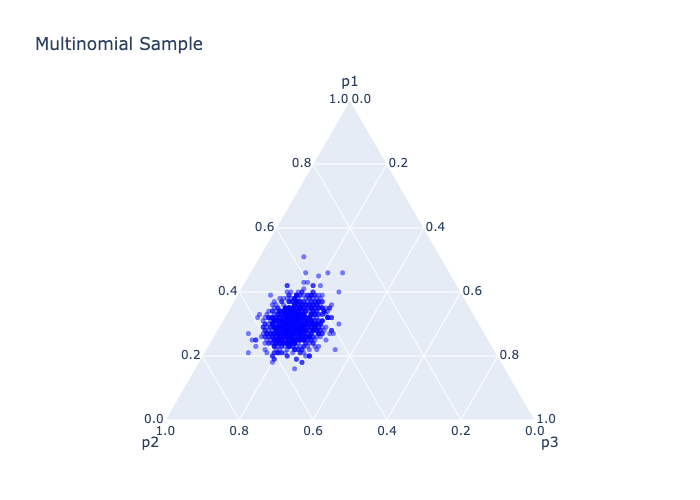

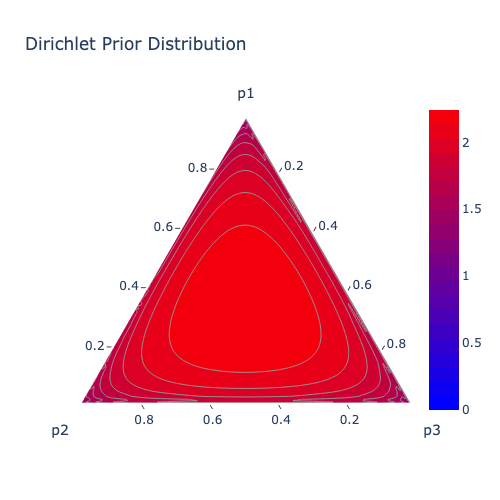

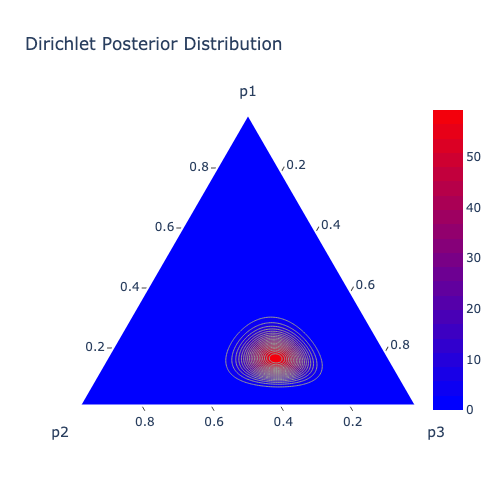

In [1]:
import numpy as np
from scipy.stats import dirichlet, multinomial
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "png"


n_trials = 1000
n_per_trial = 100
probs = [0.3, 0.5, 0.2]
multinomial_sample = multinomial.rvs(n=n_per_trial, p=probs, size=n_trials)
multinomial_sample_prop = multinomial_sample / n_per_trial

n_points = 100
p1 = np.linspace(0, 1, n_points)
p2 = np.linspace(0, 1, n_points)
P1, P2 = np.meshgrid(p1, p2)
mask = (P1 + P2 <= 1)
P1 = P1[mask]
P2 = P2[mask]
P3 = 1 - P1 - P2
valid = (P3 >= 0)
P1 = P1[valid]
P2 = P2[valid]
P3 = P3[valid]
p = np.vstack([P1, P2, P3]).T

fig_mult = go.Figure()
fig_mult.add_trace(go.Scatterternary(
    a=multinomial_sample_prop[:, 0], 
    b=multinomial_sample_prop[:, 1], 
    c=multinomial_sample_prop[:, 2], 
    mode='markers', 
    marker=dict(size=5, color='blue', opacity=0.5), name="Samples")
)
fig_mult.update_layout(title="Multinomial Sample", ternary=dict(
    aaxis=dict(title="p1", min=0, tickformat='.1f'),
    baxis=dict(title="p2", min=0, tickformat='.1f'),
    caxis=dict(title="p3", min=0, tickformat='.1f'),
))
fig_mult.show()

alpha_prior = np.array([1.1, 1.1, 1.1])
dirichlet_prior = dirichlet(alpha_prior)
prior_densities = dirichlet_prior.pdf(p.T)

# Step 4: Plot Dirichlet prior using Plotly
fig = ff.create_ternary_contour(
    p.T,
    prior_densities,
    pole_labels=["p1", "p2", "p3"],
    interp_mode="cartesian",
    showscale=True,
    ncontours=20
)

fig.update_layout(title="Dirichlet Prior Distribution")
fig.write_image("hw1_dirichlet_prior.png")
fig.show()

# Step 5: Simulate posterior update
observed_counts = [10, 20, 30]  # Observed counts
alpha_posterior = alpha_prior + observed_counts
dirichlet_posterior = dirichlet(alpha_posterior)
posterior_densities = dirichlet_posterior.pdf(p.T)

# Step 6: Plot Dirichlet posterior
fig = ff.create_ternary_contour(
    p.T,
    posterior_densities,
    pole_labels=["p1", "p2", "p3"],
    interp_mode="cartesian",
    showscale=True,
    ncontours=20
)

fig.update_layout(title="Dirichlet Posterior Distribution")
fig.write_image("hw1_dirichlet_posterior.png")
fig.show()